In [13]:
import pandas as pd
import numpy as np

In [14]:
ds = pd.read_csv("churn_modeling.csv")
ds.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
# check for null values
ds.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [16]:
# Remove attributes that are unique to the customer (attributes belonging to candidate keys)
ds.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

In [17]:
ds.shape

(10000, 11)

In [18]:
ds_encoded = pd.get_dummies(data=ds, columns=['Geography'], drop_first=True)
ds_encoded['Gender'] = ds_encoded['Gender'].replace('Male', 0)
ds_encoded['Gender'] = ds_encoded['Gender'].replace('Female', 1)
ds_encoded.shape

/tmp/ipykernel_13973/1532158063.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ds_encoded['Gender'] = ds_encoded['Gender'].replace('Female', 1)


(10000, 12)

In [21]:
ds_encoded.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_Germany       bool
Geography_Spain         bool
dtype: object

In [23]:
from sklearn.preprocessing import StandardScaler
cols = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "EstimatedSalary"]
scaler = StandardScaler()
ds_encoded[cols] = scaler.fit_transform(ds_encoded[cols])

In [25]:
ds_encoded.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,-0.326221,1,0.293517,-1.041760,-1.225848,-0.911583,0.646092,1,0.021886,1,False,False
1,-0.440036,1,0.198164,-1.387538,0.117350,-0.911583,-1.547768,1,0.216534,0,False,True
2,-1.536794,1,0.293517,1.032908,1.333053,2.527057,0.646092,0,0.240687,1,False,False
3,0.501521,1,0.007457,-1.387538,-1.225848,0.807737,-1.547768,0,-0.108918,0,False,False
4,2.063884,1,0.388871,-1.041760,0.785728,-0.911583,0.646092,1,-0.365276,0,False,True


In [27]:
from sklearn.model_selection import train_test_split 
X = ds_encoded.drop(["Exited"], axis=1) 

y = ds_encoded["Exited"] # labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=42)
clf.fit(X_train, y_train)
pred_y = clf.predict(X_test)

/home/sudarshan/greatness/python_libs/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:601: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Accuracy is 0.868
Classification report -               precision    recall  f1-score   support

           0       0.89      0.96      0.92      2416
           1       0.74      0.49      0.59       584

    accuracy                           0.87      3000
   macro avg       0.81      0.73      0.76      3000
weighted avg       0.86      0.87      0.86      3000



<Axes: >

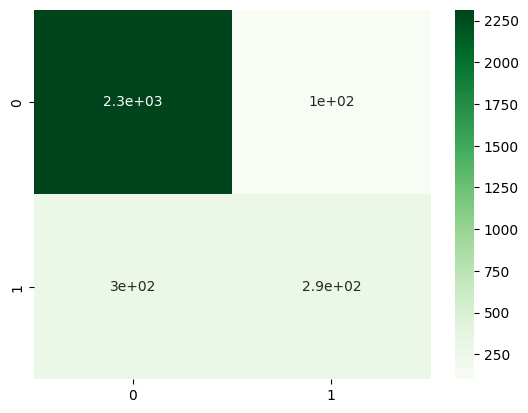

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(f"Accuracy is {accuracy_score(y_test, pred_y)}")
print(f"Classification report - {classification_report(y_test, pred_y)}")

import seaborn as sns
sns.heatmap(confusion_matrix(y_test, pred_y), annot=True, cmap='Greens')

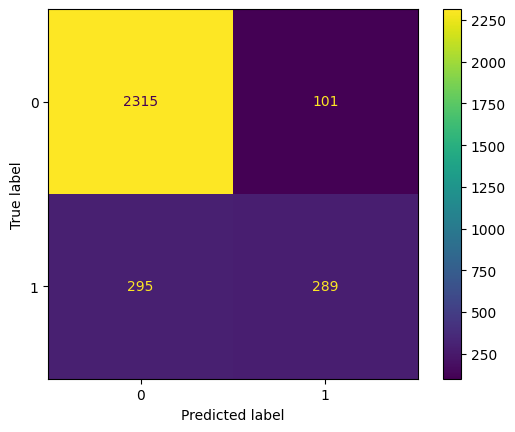

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred_y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()